In [894]:
# Importar las librerías necesarias
import os  # Para interactuar con el sistema de archivos
import pandas as pd  # Para manipulación de datos
import datetime  # Para obtener el año actual
import matplotlib.pyplot as plt  # Para visualización de datos
import seaborn as sns  # Para visualización de datos mejorada
from sklearn.preprocessing import OneHotEncoder  # Para codificación One-Hot
from sklearn.preprocessing import StandardScaler

In [895]:
# Cargar el dataset
df = pd.read_csv("germany_auto_industry_dataset.csv") 

In [896]:
# Eliminar espacios en blanco alrededor de los nombres de las columnas
df.columns = df.columns.str.strip()

# Eliminar espacios en blanco alrededor de los valores de las filas para todas las columnas de tipo objeto
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Mostrar el DataFrame modificado
df.head()

,Brand,Model,Year,Mileage,Fuel Type,Fuel Consumption (L/100km),Horsepower (HP),Transmission,Price,City
0,Audi,Q7,2006,260886,Diesel,9.5,213,Automatic,12063.27,Cologne
1,Opel,Corsa,2015,72505,Hybrid,6.5,335,Automatic,33890.58,Berlin
2,Mercedes,C-Class,2007,125356,Electric,9.9,445,Automatic,92639.12,Berlin
3,Volkswagen,Polo,2009,130867,Electric,4.1,165,Automatic,88003.50,Munich
4,Opel,Astra,2022,57482,Electric,5.2,145,Manual,26028.97,Hamburg


In [897]:
# Renombrar las columnas
df.rename(columns={
    'Brand': 'Marca',
    'Model': 'Modelo',
    'Year': 'Año',
    'Mileage': 'Kilometraje',
    'Fuel Type': 'Tipo_Combustible',
    'Fuel Consumption (L/100km)': 'Consumo_Combustible_L_100km',
    'Horsepower (HP)': 'Potencia_HP',
    'Transmission': 'Transmision',
    'Price': 'Precio_Venta',
    'City': 'Ciudad'
}, inplace=True)

In [898]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Marca                        500 non-null    object 
 1   Modelo                       500 non-null    object 
 2   Año                          500 non-null    int64  
 3   Kilometraje                  500 non-null    int64  
 4   Tipo_Combustible             500 non-null    object 
 5   Consumo_Combustible_L_100km  500 non-null    float64
 6   Potencia_HP                  500 non-null    int64  
 7   Transmision                  500 non-null    object 
 8   Precio_Venta                 500 non-null    float64
 9   Ciudad                       500 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 39.2+ KB


In [899]:
# Eliminar espacios en blanco alrededor de los nombres de las columnas
df.columns = df.columns.str.strip()

# Eliminar espacios en blanco alrededor de los valores de las filas para todas las columnas de tipo objeto
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Eliminar duplicados del DataFrame
df = df.drop_duplicates()  # Esto elimina filas duplicadas, dejando solo la primera ocurrencia

# Verificar si se han eliminado los espacios en blanco y los duplicados
print("Espacios en blanco eliminados y duplicados eliminados. Primeras filas del DataFrame:")

Espacios en blanco eliminados y duplicados eliminados. Primeras filas del DataFrame:


In [900]:
df.head(10)

,Marca,Modelo,Año,Kilometraje,Tipo_Combustible,Consumo_Combustible_L_100km,Potencia_HP,Transmision,Precio_Venta,Ciudad
0,Audi,Q7,2006,260886,Diesel,9.5,213,Automatic,12063.27,Cologne
1,Opel,Corsa,2015,72505,Hybrid,6.5,335,Automatic,33890.58,Berlin
2,Mercedes,C-Class,2007,125356,Electric,9.9,445,Automatic,92639.12,Berlin
3,Volkswagen,Polo,2009,130867,Electric,4.1,165,Automatic,88003.50,Munich
4,Opel,Astra,2022,57482,Electric,5.2,145,Manual,26028.97,Hamburg
5,Volkswagen,Tiguan,2011,107269,Electric,10.1,449,Automatic,15308.15,Berlin
6,BMW,X3,2012,121481,Petrol,10.8,456,Automatic,44140.68,Hamburg
7,BMW,5 Series,2012,251434,Petrol,11.6,368,Automatic,5986.91,Hamburg
8,Porsche,Panamera,2018,157502,Electric,8.6,101,Manual,21694.91,Frankfurt
9,BMW,3 Series,2022,25732,Electric,10.5,270,Manual,58172.74,Frankfurt


---------------------

# Tratar Columnas **Marca** y **Modelo**

Vamos a proceder con el análisis de las columnas **Marca** y **Modelo** en varias etapas. Comenzaremos creando un nuevo DataFrame `marca_modelo` con estas dos columnas. Luego, veremos la variabilidad de los datos para entender cuántas marcas y modelos únicos existen. Más adelante, convertiremos estas columnas a características utilizando *One-Hot Encoding*. A continuación, te doy el código y una breve explicación para cada paso.

### Paso 1: Crear el DataFrame `marca_modelo` con las columnas **Marca** y **Modelo**

Este primer paso nos ayudará a centrarnos en el análisis de estas dos columnas sin interferir con el DataFrame original.

In [901]:
# Crear un nuevo DataFrame con las columnas Marca y Modelo
marca_modelo = df[['Marca', 'Modelo']]

# Mostrar las primeras filas para verificar la estructura
marca_modelo.head()

,Marca,Modelo
0,Audi,Q7
1,Opel,Corsa
2,Mercedes,C-Class
3,Volkswagen,Polo
4,Opel,Astra


In [902]:
# Convertir las columnas Marca y Modelo a tipo categórico
marca_modelo['Marca'] = marca_modelo['Marca'].astype('category')
marca_modelo['Modelo'] = marca_modelo['Modelo'].astype('category')

# Verificar el cambio de tipo
marca_modelo.dtypes

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_2472\1361401208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marca_modelo['Marca'] = marca_modelo['Marca'].astype('category')
C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_2472\1361401208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marca_modelo['Modelo'] = marca_modelo['Modelo'].astype('category')


Marca     category
Modelo    category
dtype: object

### Paso 2: Verificar la variabilidad de las columnas

Ahora, revisaremos cuántas marcas y modelos únicos existen en los datos para entender mejor la diversidad de la información en estas dos columnas.

In [903]:
# Contar el número de marcas únicas
num_marcas = marca_modelo['Marca'].nunique()
print("Número de marcas únicas:", num_marcas)

Número de marcas únicas: 6


In [904]:
# Contar el número de modelos únicos
num_modelos = marca_modelo['Modelo'].nunique()
print("Número de modelos únicos:", num_modelos)

Número de modelos únicos: 22


In [905]:
# Mostrar todas las marcas y modelos únicos (opcional para inspección)
marcas_unicas = marca_modelo['Marca'].unique()
modelos_unicos = marca_modelo['Modelo'].unique()
print("Marcas únicas:", marcas_unicas)

Marcas únicas: ['Audi', 'Opel', 'Mercedes', 'Volkswagen', 'BMW', 'Porsche']
Categories (6, object): ['Audi', 'BMW', 'Mercedes', 'Opel', 'Porsche', 'Volkswagen']


In [906]:
print("Modelos únicos:", modelos_unicos)

Modelos únicos: ['Q7', 'Corsa', 'C-Class', 'Polo', 'Astra', ..., 'GLE', 'A4', 'X5', 'Macan', 'Cayenne']
Length: 22
Categories (22, object): ['3 Series', '5 Series', 'A3', 'A4', ..., 'Q7', 'Tiguan', 'X3', 'X5']


### Paso 3: Convertir las columnas **Marca** y **Modelo** en características mediante One-Hot Encoding

El siguiente paso es convertir estas columnas de tipo `object` en variables numéricas. Usaremos *One-Hot Encoding* para representar cada marca y modelo como una columna binaria (0 o 1), lo cual es ideal para características categóricas en modelos de machine learning.

In [907]:
# Crear el objeto OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  
# sparse_output=False asegura que el resultado sea un array denso (sin formato disperso).
# drop='first' elimina la primera categoría de cada columna para evitar la multicolinealidad,
# lo que es útil para evitar redundancias en la codificación.

# Ajustar y transformar las columnas 'Marca' y 'Modelo'
encoded_features = encoder.fit_transform(marca_modelo[['Marca', 'Modelo']])
# fit_transform() ajusta el codificador a las columnas seleccionadas y las transforma
# en un array donde cada categoría única se convierte en una columna binaria (0 o 1).

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_features, 
                           columns=encoder.get_feature_names_out(['Marca', 'Modelo']))
# pd.DataFrame() convierte el array de características codificadas en un DataFrame.
# get_feature_names_out() genera nombres para las nuevas columnas en función de las
# categorías originales, permitiendo que las columnas tengan nombres descriptivos.

# Unir el DataFrame original con el DataFrame codificado
marca_modelo_encoded = pd.concat([marca_modelo.drop(columns=['Marca', 'Modelo']), 
                                   encoded_df], axis=1)
# pd.concat() combina el DataFrame original (sin las columnas 'Marca' y 'Modelo')
# con el nuevo DataFrame que contiene las columnas codificadas.
# axis=1 indica que la concatenación se realiza a lo largo de las columnas.

# Mostrar las primeras filas del DataFrame transformado
marca_modelo_encoded.head()
# head() muestra las primeras filas del DataFrame resultante para verificar el resultado de
# la codificación.

,Marca_Audi,Marca_BMW,Marca_Mercedes,Marca_Opel,Marca_Porsche,Marca_Volkswagen,Modelo_3 Series,Modelo_5 Series,Modelo_A3,Modelo_A4,Modelo_Astra,Modelo_C-Class,Modelo_Cayenne,Modelo_Corsa,Modelo_E-Class,Modelo_GLA,Modelo_GLE,Modelo_Golf,Modelo_Insignia,Modelo_Macan,Modelo_Panamera,Modelo_Passat,Modelo_Polo,Modelo_Q5,Modelo_Q7,Modelo_Tiguan,Modelo_X3,Modelo_X5
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [908]:


# Definir el nombre de la carpeta y el archivo de salida
carpeta = "datos_limpios"
archivo_salida = "1_marca_modelo_encoded.csv"

# Crear la carpeta si no existe
if not os.path.exists(carpeta):
    os.makedirs(carpeta)  # Crea la carpeta "datos_limpios"

# Guardar el DataFrame en un archivo CSV dentro de la carpeta
ruta_completa = os.path.join(carpeta, archivo_salida)  # Unir la carpeta y el nombre del archivo
marca_modelo_encoded.to_csv(ruta_completa, index=False)  # Guardar sin el índice

# Mensaje de confirmación
print(f"El archivo se ha guardado en: {ruta_completa}")

El archivo se ha guardado en: datos_limpios\1_marca_modelo_encoded.csv


---------------------------------

# Tratar Columnas **Anio**

#### 1. Verificar valores inusuales en la columna `Año`
- Comprobar si hay años futuros o si hay valores que no tienen sentido (por ejemplo, años que son muy antiguos).

In [909]:
año_actual = datetime.datetime.now().year

# Verificar si hay años futuros o valores inusuales
valores_inusuales = df[(df['Año'] > año_actual) | (df['Año'] < 1886)]  # 1886 es generalmente considerado el año de invención del automóvil
print("Valores inusuales en la columna 'Año':")
print(valores_inusuales)

Valores inusuales en la columna 'Año':
Empty DataFrame
Columns: [Marca, Modelo, Año, Kilometraje, Tipo_Combustible, Consumo_Combustible_L_100km, Potencia_HP, Transmision, Precio_Venta, Ciudad]
Index: []


#### 2. Crear una nueva columna para la antigüedad del vehículo

- Calcular la antigüedad restando el año del modelo del año actual.

In [910]:
# Calcular la antigüedad del vehículo
df['Antigüedad'] = año_actual - df['Año']

# Verificar la nueva columna
print("Se ha agregado la columna 'Antigüedad'. Primeras filas del DataFrame:")
print(df[['Año', 'Antigüedad']].head())

Se ha agregado la columna 'Antigüedad'. Primeras filas del DataFrame:
    Año  Antigüedad
0  2006          18
1  2015           9
2  2007          17
3  2009          15
4  2022           2


La limpieza de datos en la columna Año fue exitosa y no se encontraron problemas. Además, has agregado una nueva característica que puede ser muy útil para análisis posteriores, como determinar cómo la antigüedad de un vehículo puede afectar su precio o su tipo de combustible.

In [911]:
# Crear un nuevo DataFrame solo con las columnas 'Año' y 'Antigüedad'
anio_antiguedad_df = df[['Año', 'Antigüedad']]

# Guardar el nuevo DataFrame en un archivo CSV en la carpeta 'datos_limpios'
anio_antiguedad_df.to_csv('datos_limpios/2_anio_antiguedad.csv', index=False)

----------------------

# Tratar Columnas **Kilometraje**

Para analizar la columna `Kilometraje` y detectar valores atípicos o inconsistencias, podemos realizar los siguientes pasos:

1. **Visualizar la distribución del Kilometraje**: Esto puede hacerse mediante un histograma o un boxplot, lo que te permitirá ver la distribución y los posibles valores atípicos.

2. **Calcular estadísticas descriptivas**: Con esto podrás ver el rango, la media, los percentiles, y otros valores que te ayudarán a identificar posibles valores extremos.

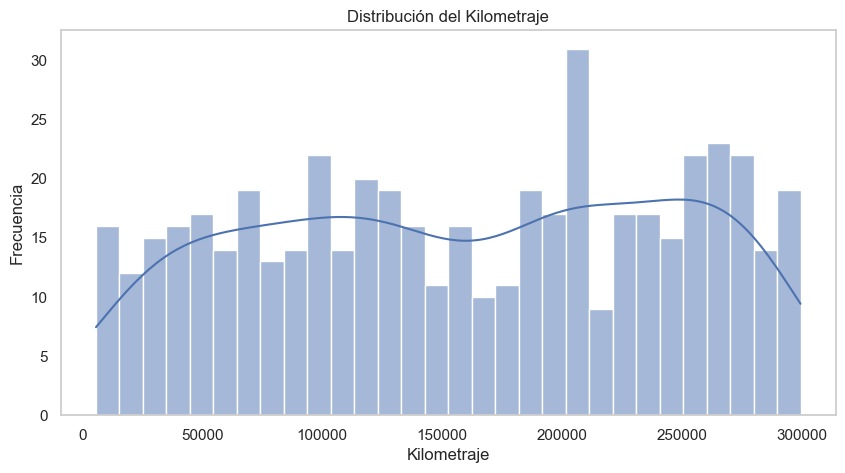

count       500.000000
mean     158885.270000
std       85604.122684
min        5667.000000
25%       85787.250000
50%      160433.500000
75%      234079.750000
max      299573.000000
Name: Kilometraje, dtype: float64
Valores atípicos detectados en la columna 'Kilometraje':
Empty DataFrame
Columns: [Marca, Modelo, Kilometraje]
Index: []


In [912]:
# Visualizar la distribución del Kilometraje con un histograma
plt.figure(figsize=(10, 5))
sns.histplot(df['Kilometraje'], bins=30, kde=True)
plt.title('Distribución del Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

# Calcular estadísticas descriptivas para Kilometraje
kilometraje_stats = df['Kilometraje'].describe()
print(kilometraje_stats)

# Detectar valores atípicos utilizando el rango intercuartílico (IQR)
Q1 = df['Kilometraje'].quantile(0.25)
Q3 = df['Kilometraje'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
outliers = df[(df['Kilometraje'] < lower_bound) | (df['Kilometraje'] > upper_bound)]
print("Valores atípicos detectados en la columna 'Kilometraje':")
print(outliers[['Marca', 'Modelo', 'Kilometraje']])

### Resultados del Análisis de la Columna `Kilometraje`:

A. **Estadísticas Descriptivas**:
   - **Count**: Hay un total de 500 registros en la columna `Kilometraje`.
   - **Mean (Media)**: El kilómetro promedio registrado es de **158,885.27** km.
   - **Standard Deviation (Desviación Estándar)**: La variabilidad en los datos es bastante alta, con una desviación estándar de **85,604.12** km.
   - **Min (Mínimo)**: El valor más bajo es **5,667** km, lo que indica que algunos vehículos han sido utilizados poco.
   - **25% (Q1)**: El primer cuartil está en **85,787.25** km, lo que significa que el 25% de los vehículos tienen un kilometraje menor a este valor.
   - **50% (Q2 o Mediana)**: La mediana es de **160,433.50** km, indicando que la mitad de los vehículos tienen un kilometraje inferior a este valor.
   - **75% (Q3)**: El tercer cuartil se sitúa en **234,079.75** km, lo que implica que el 75% de los vehículos tienen un kilometraje menor a este valor.
   - **Max (Máximo)**: El valor más alto registrado es de **299,573** km.

B. **Valores Atípicos**:
   - El análisis no ha detectado valores atípicos en la columna `Kilometraje`. Esto significa que, dentro del rango de valores, no hay registros que se consideren extremos o inconsistentes en comparación con el resto de los datos.

### Reflexión:
La distribución del `Kilometraje` parece estar en un rango razonable, dado que todos los valores se encuentran dentro de los límites establecidos por el rango intercuartílico. Sin embargo, es importante considerar el contexto del dominio (por ejemplo, la antigüedad de los vehículos) para interpretar estos valores de manera adecuada.

C. **Categorizar el Kilometraje**

In [913]:
# Definir las categorías de kilometraje
def categorizar_kilometraje(km):
    if km < 100000:  # Menos de 100,000 km se considera bajo
        return 'Bajo'
    elif 100000 <= km < 200000:  # Entre 100,000 y 200,000 km se considera medio
        return 'Medio'
    else:  # 200,000 km o más se considera alto
        return 'Alto'

# Aplicar la función a la columna 'Kilometraje' y crear una nueva columna 'Categoria_Kilometraje'
df['Categoria_Kilometraje'] = df['Kilometraje'].apply(categorizar_kilometraje)

# Mostrar las primeras filas del DataFrame para verificar la nueva columna
print(df[['Kilometraje', 'Categoria_Kilometraje']].head())


   Kilometraje Categoria_Kilometraje
0       260886                  Alto
1        72505                  Bajo
2       125356                 Medio
3       130867                 Medio
4        57482                  Bajo


### Descripción del Código:

1. **Definición de la Función**:
   - `categorizar_kilometraje(km)`: Esta función toma como entrada el kilometraje de un vehículo y lo clasifica en "Bajo", "Medio" o "Alto" según los criterios establecidos.

2. **Aplicación de la Función**:
   - `df['Categoria_Kilometraje'] = df['Kilometraje'].apply(categorizar_kilometraje)`: Se aplica la función a la columna `Kilometraje` del DataFrame `df`, y los resultados se almacenan en una nueva columna llamada `Categoria_Kilometraje`.

3. **Verificación**:
   - `print(df[['Kilometraje', 'Categoria_Kilometraje']].head())`: Se muestran las primeras filas del DataFrame para verificar que la categorización se ha realizado correctamente.

D. **Crear y Guardar el Nuevo DataFrame**

In [914]:
# Crear un nuevo DataFrame con las columnas Kilometraje y Categoria_Kilometraje
kilometraje_categoria = df[['Kilometraje', 'Categoria_Kilometraje']]

# Guardar el nuevo DataFrame en un archivo CSV en la carpeta 'datos_limpios'
kilometraje_categoria.to_csv('datos_limpios/3_kilometraje_categoria.csv', index=False)

# Mensaje de confirmación
print("El archivo 'kilometraje_categoria.csv' ha sido guardado en la carpeta 'datos_limpios'.")

El archivo 'kilometraje_categoria.csv' ha sido guardado en la carpeta 'datos_limpios'.


-------------------

# Tratar Columnas **Combustible**

1. **Verificar la Variabilidad de los Datos**

In [915]:
# Verificar la variabilidad de los datos en la columna 'Tipo_Combustible'
tipo_combustible_variabilidad = df['Tipo_Combustible'].value_counts()

# Mostrar la variabilidad de los tipos de combustible
tipo_combustible_variabilidad

Tipo_Combustible
Petrol      135
Electric    129
Hybrid      123
Diesel      113
Name: count, dtype: int64

2. **Estandarizar los Tipos de Combustible**

In [916]:
# Estandarizar los tipos de combustible
df['Tipo_Combustible'] = df['Tipo_Combustible'].replace({
    'Petrol': 'Gasolina',
    'Electric': 'Eléctrico',
    'Hybrid': 'Híbrido',
    'Diesel': 'Diésel'
})

# Verificar los cambios
tipo_combustible_actualizado = df['Tipo_Combustible'].value_counts()
print("Tipos de combustible estandarizados:")
tipo_combustible_actualizado

Tipos de combustible estandarizados:


Tipo_Combustible
Gasolina     135
Eléctrico    129
Híbrido      123
Diésel       113
Name: count, dtype: int64

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_2472\376878640.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_combustible_counts.index, y=tipo_combustible_counts.values, palette='viridis')


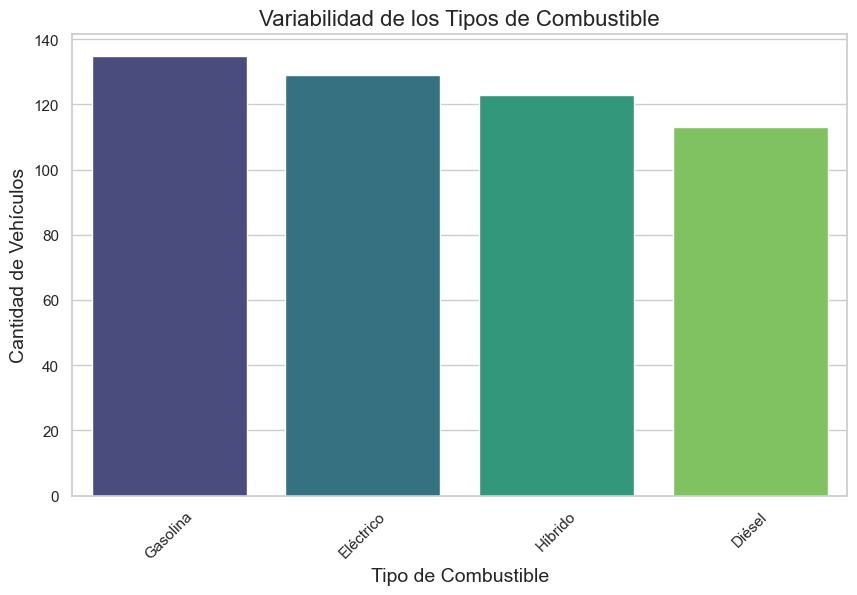

In [917]:
# Contar la cantidad de vehículos por tipo de combustible
tipo_combustible_counts = df['Tipo_Combustible'].value_counts()

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras
sns.barplot(x=tipo_combustible_counts.index, y=tipo_combustible_counts.values, palette='viridis')

# Añadir título y etiquetas
plt.title('Variabilidad de los Tipos de Combustible', fontsize=16)
plt.xlabel('Tipo de Combustible', fontsize=14)
plt.ylabel('Cantidad de Vehículos', fontsize=14)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.show()

3. **Nuevo DataFrame con Tipo_Combustible**

4. **Aplicar One-Hot Encoding a Tipo_Combustible**

In [918]:
# Crear el objeto OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False para obtener un array denso

# Ajustar y transformar la columna 'Tipo_Combustible'
encoded_tipo_combustible = encoder.fit_transform(df[['Tipo_Combustible']])

# Crear un DataFrame con las columnas codificadas
encoded_columns = encoder.get_feature_names_out(['Tipo_Combustible'])
df_encoded_tipo_combustible = pd.DataFrame(encoded_tipo_combustible, columns=encoded_columns)

# Concatenar el DataFrame original con el nuevo DataFrame codificado
df = pd.concat([df, df_encoded_tipo_combustible], axis=1)

# Eliminar la columna original 'Tipo_Combustible' si es necesario
df.drop('Tipo_Combustible', axis=1, inplace=True)

# Ver las primeras filas del DataFrame resultante
df.head()

,Marca,Modelo,Año,Kilometraje,Consumo_Combustible_L_100km,Potencia_HP,Transmision,Precio_Venta,Ciudad,Antigüedad,Categoria_Kilometraje,Tipo_Combustible_Diésel,Tipo_Combustible_Eléctrico,Tipo_Combustible_Gasolina,Tipo_Combustible_Híbrido
0,Audi,Q7,2006,260886,9.5,213,Automatic,12063.27,Cologne,18,Alto,1.0,0.0,0.0,0.0
1,Opel,Corsa,2015,72505,6.5,335,Automatic,33890.58,Berlin,9,Bajo,0.0,0.0,0.0,1.0
2,Mercedes,C-Class,2007,125356,9.9,445,Automatic,92639.12,Berlin,17,Medio,0.0,1.0,0.0,0.0
3,Volkswagen,Polo,2009,130867,4.1,165,Automatic,88003.50,Munich,15,Medio,0.0,1.0,0.0,0.0
4,Opel,Astra,2022,57482,5.2,145,Manual,26028.97,Hamburg,2,Bajo,0.0,1.0,0.0,0.0


In [919]:
# Crear un nuevo DataFrame solo con las columnas codificadas de Tipo_Combustible
tipo_combustible_df = df_encoded_tipo_combustible.copy()

# Guardar el DataFrame en un archivo CSV en la carpeta 'datos_limpios'
tipo_combustible_df.to_csv('datos_limpios/4_tipo_combustible.csv', index=False)

# Ver las primeras filas del nuevo DataFrame
tipo_combustible_df.head()

,Tipo_Combustible_Diésel,Tipo_Combustible_Eléctrico,Tipo_Combustible_Gasolina,Tipo_Combustible_Híbrido
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


------------------

# **Consumo Combustible L100km**

1. **Análisis Estadístico Descriptivo**

Primero, vamos a obtener estadísticas descriptivas para identificar el rango de valores y posibles inconsistencias.

In [920]:
# Obtener estadísticas descriptivas de la columna 'Consumo_Combustible_L_100km'
consumo_estadisticas = df['Consumo_Combustible_L_100km'].describe()

# Mostrar estadísticas
print(consumo_estadisticas)

count    500.000000
mean       7.630800
std        2.654805
min        3.000000
25%        5.300000
50%        7.900000
75%       10.000000
max       12.000000
Name: Consumo_Combustible_L_100km, dtype: float64


2. **Detección de Valores Extremos**

Después de obtener las estadísticas, podemos identificar valores atípicos o extremos utilizando un enfoque de rango intercuartílico (IQR).

In [921]:
# Calcular los cuartiles
# Q1 es el primer cuartil (25% de los datos), representa el valor por debajo del cual se encuentra el 25% de los datos.
Q1 = df['Consumo_Combustible_L_100km'].quantile(0.25)

# Q3 es el tercer cuartil (75% de los datos), representa el valor por debajo del cual se encuentra el 75% de los datos.
Q3 = df['Consumo_Combustible_L_100km'].quantile(0.75)

# IQR (Rango Intercuartílico) es la diferencia entre Q3 y Q1. Nos ayuda a entender la dispersión de los datos.
IQR = Q3 - Q1

# Definir límites para identificar valores extremos
# El límite inferior se establece como Q1 menos 1.5 veces el IQR. Esto significa que cualquier valor por debajo de este límite se considera un valor atípico.
limite_inferior = Q1 - 1.5 * IQR

# El límite superior se establece como Q3 más 1.5 veces el IQR. Esto significa que cualquier valor por encima de este límite también se considera un valor atípico.
limite_superior = Q3 + 1.5 * IQR

# Filtrar valores extremos
# Se crea un nuevo DataFrame llamado 'valores_extremos' que contiene solo las filas donde el consumo de combustible es menor que el límite inferior o mayor que el límite superior.
valores_extremos = df[(df['Consumo_Combustible_L_100km'] < limite_inferior) | 
                       (df['Consumo_Combustible_L_100km'] > limite_superior)]

# Mostrar valores extremos detectados
# Se imprimen los valores extremos encontrados, mostrando únicamente las columnas 'Marca', 'Modelo' y 'Consumo_Combustible_L_100km' para facilitar la revisión.
print("Valores extremos detectados en la columna 'Consumo_Combustible_L_100km':")
print(valores_extremos[['Marca', 'Modelo', 'Consumo_Combustible_L_100km']])

Valores extremos detectados en la columna 'Consumo_Combustible_L_100km':
Empty DataFrame
Columns: [Marca, Modelo, Consumo_Combustible_L_100km]
Index: []


3. **Visualización (opcional)**

Para tener una mejor idea de la distribución de los datos, podemos graficar un boxplot.

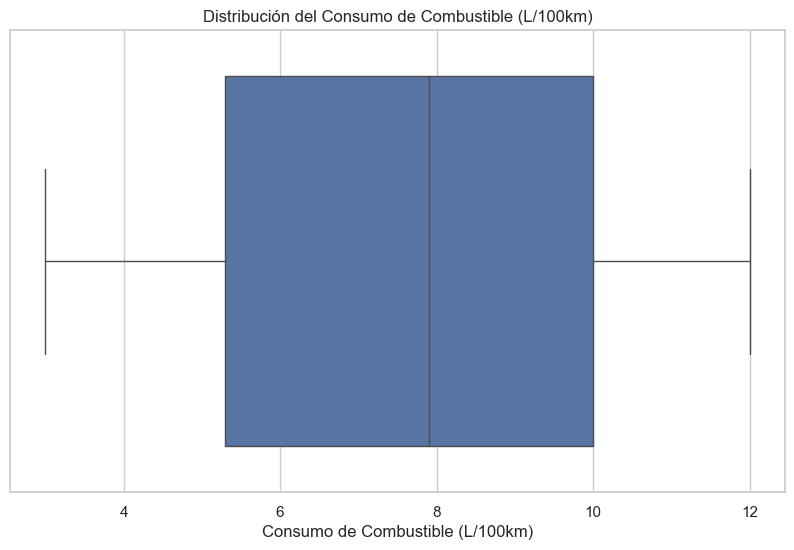

In [922]:
# Crear un boxplot para visualizar la distribución del consumo
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Consumo_Combustible_L_100km'])
plt.title('Distribución del Consumo de Combustible (L/100km)')
plt.xlabel('Consumo de Combustible (L/100km)')
plt.show()

In [923]:
# Seleccionar la columna 'Consumo_Combustible_L_100km' y guardarla en un nuevo DataFrame
consumo_combustible_df = df[['Consumo_Combustible_L_100km']]

# Guardar el DataFrame en un archivo CSV
consumo_combustible_df.to_csv('datos_limpios/6_consumo_por_cada_100.csv', index=False)


----------------------

# **Potencia HP**

#### 1. **Código para graficar la variabilidad de `Potencia_HP`**

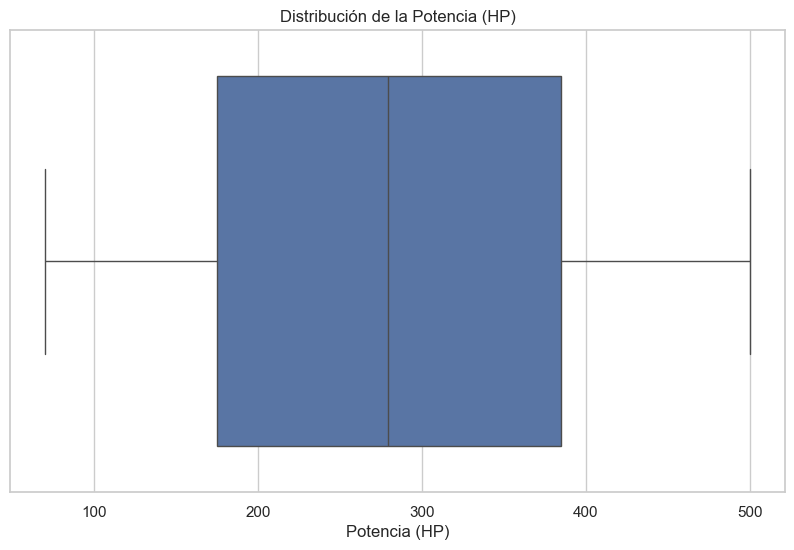

In [924]:
# Configuración del estilo de la gráfica
sns.set(style='whitegrid')

# Crear la gráfica de caja para visualizar la distribución de Potencia_HP
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Potencia_HP'])
plt.title('Distribución de la Potencia (HP)')
plt.xlabel('Potencia (HP)')
plt.show()

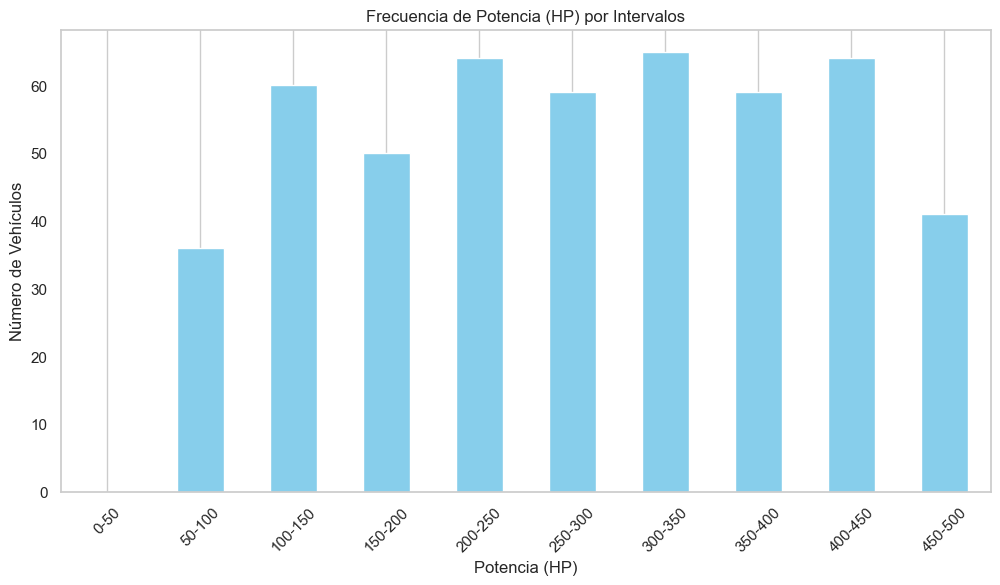

In [925]:
# Crear intervalos (bins) para la potencia
bins = range(0, int(df['Potencia_HP'].max()) + 50, 50)  # Ajustar el rango y el tamaño de los intervalos
labels = [f"{i}-{i+50}" for i in bins[:-1]]  # Crear etiquetas para los intervalos

# Crear una nueva columna para las categorías de potencia
df['Potencia_Categoría'] = pd.cut(df['Potencia_HP'], bins=bins, labels=labels, right=False)

# Contar la frecuencia de cada categoría
frecuencia_potencia = df['Potencia_Categoría'].value_counts().sort_index()

# Graficar la frecuencia utilizando una gráfica de barras
plt.figure(figsize=(12, 6))
frecuencia_potencia.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Potencia (HP) por Intervalos')
plt.xlabel('Potencia (HP)')
plt.ylabel('Número de Vehículos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Breve Explicación**
- **Visualización de la Variabilidad:** La gráfica de caja (boxplot) es útil para visualizar la distribución de la variable `Potencia_HP`. Muestra la mediana, los cuartiles y los posibles valores atípicos de manera clara. Esto nos ayuda a identificar visualmente si hay valores que se desvían significativamente de la mayoría de los datos.

#### 2. **Código para verificar valores atípicos en `Potencia_HP`**

In [926]:
# Calcular los cuartiles
Q1 = df['Potencia_HP'].quantile(0.25)
Q3 = df['Potencia_HP'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar valores extremos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar valores extremos
valores_extremos_potencia = df[(df['Potencia_HP'] < limite_inferior) | 
                                 (df['Potencia_HP'] > limite_superior)]

# Mostrar valores extremos detectados
print("Valores extremos detectados en la columna 'Potencia_HP':")
print(valores_extremos_potencia[['Marca', 'Modelo', 'Potencia_HP']])

Valores extremos detectados en la columna 'Potencia_HP':
Empty DataFrame
Columns: [Marca, Modelo, Potencia_HP]
Index: []


### Breve Explicación
- **Verificación de Valores Atípicos:** En este código, utilizamos el mismo enfoque que utilizamos para identificar valores atípicos en `Consumo_Combustible_L_100km`. Calculamos los cuartiles y el rango intercuartílico (IQR) para definir los límites inferiores y superiores. Esto nos permite identificar y filtrar cualquier potencia que sea anormalmente baja o alta. Detectar estos valores es importante porque pueden influir negativamente en los análisis y modelos posteriores, ya que pueden ser el resultado de errores en la recolección de datos o indicar condiciones anormales que no son representativas del conjunto de datos.

In [927]:
# Crear un nuevo DataFrame con solo la columna Potencia_HP
potencia_hp_df = df[['Potencia_HP']].copy()

# Guardar el DataFrame en un archivo CSV
potencia_hp_df.to_csv("datos_limpios/7_Potencia_HP.csv", index=False)

-------------------------

# **Transmision**

#### 1. Verificar y Estandarizar los Valores de Transmisión

In [928]:
# Verificar los valores únicos en la columna 'Transmision'
valores_unicos_transmision = df['Transmision'].unique()
print("Valores únicos en la columna 'Transmision':", valores_unicos_transmision)

# Estandarizar los valores de transmisión a español
df['Transmision'] = df['Transmision'].replace({
    'Manual': 'Manual',
    'Automatic': 'Automática',
    'Semi-Automatic': 'Semi-Automática',
    # Añadir más opciones si hay otros valores únicos
})

Valores únicos en la columna 'Transmision': ['Automatic' 'Manual']


### Explicación
- **Verificar Valores Únicos:** Se utiliza `unique()` para listar los valores únicos en la columna `Transmision`, lo que permite identificar cualquier inconsistencia en la forma en que se registran los tipos de transmisión.
- **Estandarización:** Usamos `replace()` para cambiar los nombres de transmisión a su versión en español. Esto asegura que todas las entradas sean consistentes y facilita futuros análisis.

#### 2. Analizar la Distribución de Transmisiones

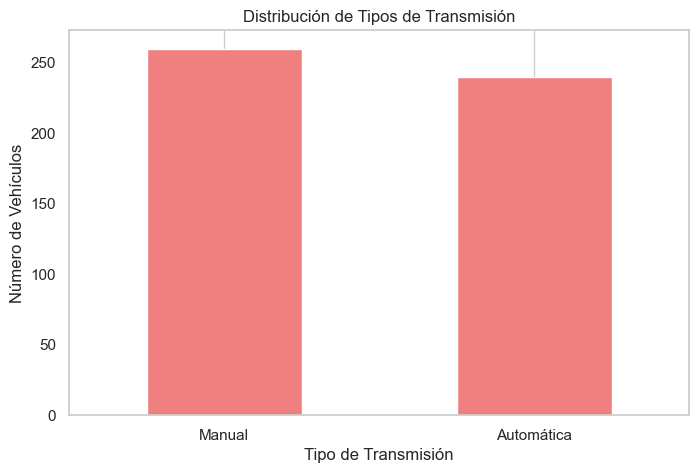

In [929]:
# Contar la frecuencia de cada tipo de transmisión
frecuencia_transmision = df['Transmision'].value_counts()

# Graficar la distribución de transmisión
plt.figure(figsize=(8, 5))
frecuencia_transmision.plot(kind='bar', color='lightcoral')
plt.title('Distribución de Tipos de Transmisión')
plt.xlabel('Tipo de Transmisión')
plt.ylabel('Número de Vehículos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

#### 3. Análisis del Efecto de la Transmisión en el Precio de Venta

<Figure size 1000x600 with 0 Axes>

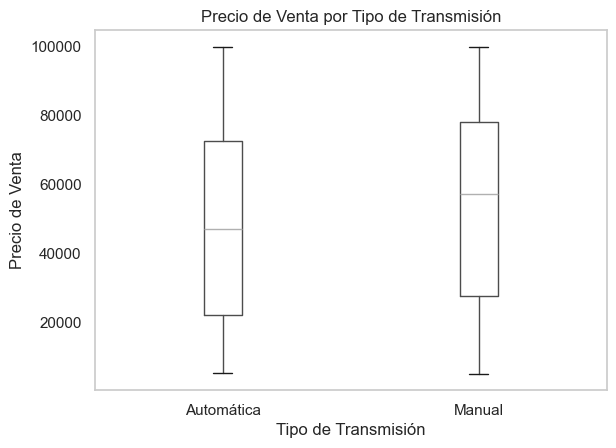

In [930]:
# Graficar el precio de venta en función de la transmisión
plt.figure(figsize=(10, 6))
df.boxplot(column='Precio_Venta', by='Transmision', grid=False)
plt.title('Precio de Venta por Tipo de Transmisión')
plt.suptitle('')  # Eliminar el título por defecto que añade pandas
plt.xlabel('Tipo de Transmisión')
plt.ylabel('Precio de Venta')
plt.show()


### Explicación
- **Frecuencia de Transmisiones:** Contamos cuántos vehículos tienen cada tipo de transmisión y graficamos esos valores en una gráfica de barras, lo que nos permite ver rápidamente cuál tipo de transmisión es más común.
- **Análisis de Precio de Venta:** Usamos un boxplot para visualizar la distribución del `Precio_Venta` en función del tipo de transmisión. Esto ayuda a identificar si hay diferencias significativas en los precios de venta entre las transmisiones manuales y automáticas.

#### 4. Aplicar One-Hot Encoding a la Columna

In [931]:
# Crear el objeto OneHotEncoder sin eliminar columnas
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False para obtener un array denso

# Ajustar y transformar la columna 'Transmision'
encoded_transmision = encoder.fit_transform(df[['Transmision']])

# Obtener los nombres de las columnas codificadas
encoded_columns = encoder.get_feature_names_out(['Transmision'])

# Crear un DataFrame con las columnas codificadas
df_encoded_transmision = pd.DataFrame(encoded_transmision, columns=encoded_columns)

# Renombrar las columnas de transmisión
df_encoded_transmision.rename(columns={
    'Transmision_Automatic': 'Transmision_Automatica',
    'Transmision_Manual': 'Transmision_Manual'
}, inplace=True)

# Concatenar el DataFrame original con el nuevo DataFrame codificado
df = pd.concat([df, df_encoded_transmision], axis=1)

# Eliminar la columna original 'Transmision' si es necesario
df.drop('Transmision', axis=1, inplace=True)

# Ver las primeras filas del DataFrame resultante
df.head()


,Marca,Modelo,Año,Kilometraje,Consumo_Combustible_L_100km,Potencia_HP,Precio_Venta,Ciudad,Antigüedad,Categoria_Kilometraje,Tipo_Combustible_Diésel,Tipo_Combustible_Eléctrico,Tipo_Combustible_Gasolina,Tipo_Combustible_Híbrido,Potencia_Categoría,Transmision_Automática,Transmision_Manual
0,Audi,Q7,2006,260886,9.5,213,12063.27,Cologne,18,Alto,1.0,0.0,0.0,0.0,200-250,1.0,0.0
1,Opel,Corsa,2015,72505,6.5,335,33890.58,Berlin,9,Bajo,0.0,0.0,0.0,1.0,300-350,1.0,0.0
2,Mercedes,C-Class,2007,125356,9.9,445,92639.12,Berlin,17,Medio,0.0,1.0,0.0,0.0,400-450,1.0,0.0
3,Volkswagen,Polo,2009,130867,4.1,165,88003.50,Munich,15,Medio,0.0,1.0,0.0,0.0,150-200,1.0,0.0
4,Opel,Astra,2022,57482,5.2,145,26028.97,Hamburg,2,Bajo,0.0,1.0,0.0,0.0,100-150,0.0,1.0


In [932]:
# Crear un nuevo DataFrame solo con las columnas de transmisión
tipo_transmision = df[['Transmision_Automática', 'Transmision_Manual']].copy()

# Guardar el DataFrame en un archivo CSV
tipo_transmision.to_csv('datos_limpios/5_tipo_transmision.csv', index=False)

# Ver las primeras filas del nuevo DataFrame
print(tipo_transmision.head())

   Transmision_Automática  Transmision_Manual
0                     1.0                 0.0
1                     1.0                 0.0
2                     1.0                 0.0
3                     1.0                 0.0
4                     0.0                 1.0


-----------------------

# **Precio**

Verificación de valores extremos en la columna Precio_Venta. Primero, calcularemos los cuartiles y utilizaremos el rango intercuartílico (IQR) para detectar valores atípicos.

In [933]:
# Calcular los cuartiles
Q1 = df['Precio_Venta'].quantile(0.25)
Q3 = df['Precio_Venta'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar valores extremos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar valores extremos
valores_extremos_precio = df[(df['Precio_Venta'] < limite_inferior) | 
                              (df['Precio_Venta'] > limite_superior)]

# Mostrar valores extremos detectados
print("Valores extremos detectados en la columna 'Precio_Venta':")
print(valores_extremos_precio[['Marca', 'Modelo', 'Precio_Venta']])

Valores extremos detectados en la columna 'Precio_Venta':
Empty DataFrame
Columns: [Marca, Modelo, Precio_Venta]
Index: []


--------------------------

# **Ciudades**

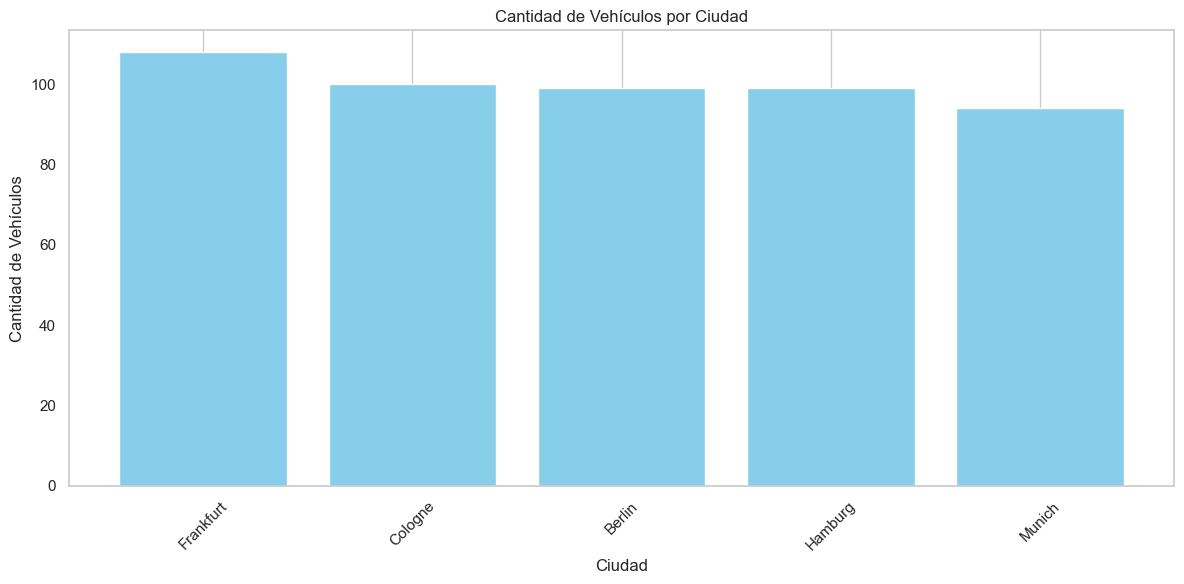

In [934]:
# Agrupar los datos por ciudad y contar el número de vehículos
vehiculos_por_ciudad = df['Ciudad'].value_counts().reset_index()
vehiculos_por_ciudad.columns = ['Ciudad', 'Cantidad_Vehiculos']

# Graficar la cantidad de vehículos por ciudad
plt.figure(figsize=(12, 6))
plt.bar(vehiculos_por_ciudad['Ciudad'], vehiculos_por_ciudad['Cantidad_Vehiculos'], color='skyblue')
plt.title('Cantidad de Vehículos por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Vehículos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [935]:
# Crear un nuevo DataFrame solo con la columna 'Ciudad'
ciudades_df = df[['Ciudad']].copy()

# Guardar el DataFrame en un archivo CSV
ciudades_df.to_csv("datos_limpios/8_ciudades.csv", index=False)

# Mostrar el DataFrame para confirmar
ciudades_df.head()

,Ciudad
0,Cologne
1,Berlin
2,Berlin
3,Munich
4,Hamburg


### Agrupar los datos por ciudad y calcular el promedio de precio de venta

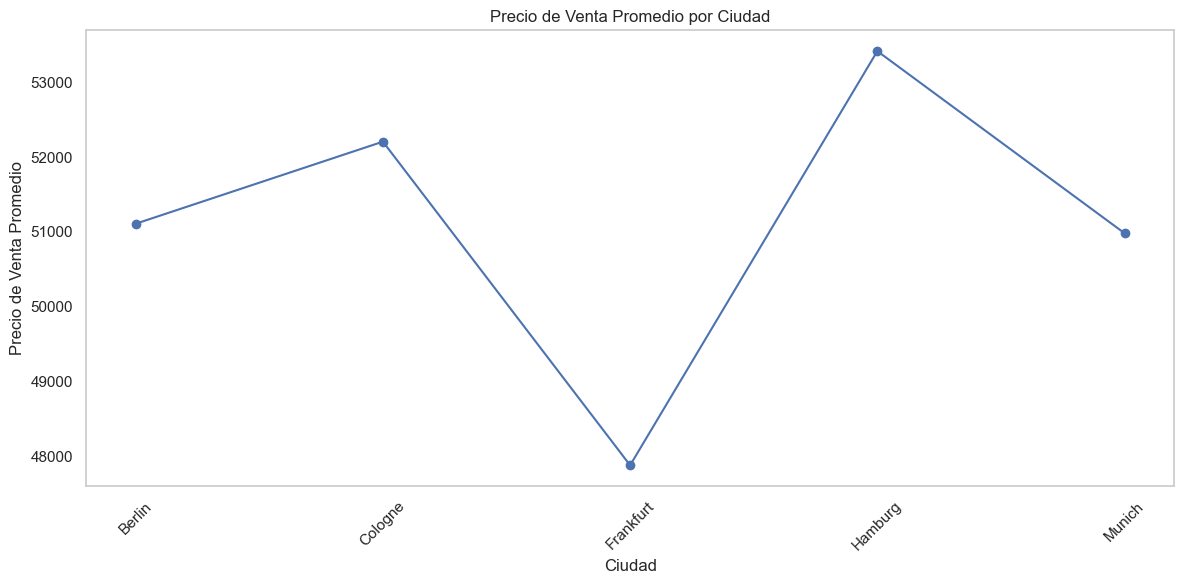

In [936]:
precio_por_ciudad = df.groupby('Ciudad')['Precio_Venta'].mean().reset_index()

# Graficar el promedio de precios de venta por ciudad
plt.figure(figsize=(12, 6))
plt.plot(precio_por_ciudad['Ciudad'], precio_por_ciudad['Precio_Venta'], marker='o')
plt.title('Precio de Venta Promedio por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio de Venta Promedio')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [937]:
# Crear un nuevo DataFrame solo con la columna 'Precio_Venta'
precios_df = df[['Precio_Venta']].copy()

# Guardar el DataFrame en un archivo CSV
precios_df.to_csv("datos_limpios/9_precios.csv", index=False)

# Mostrar el DataFrame para confirmar
precios_df.head()

,Precio_Venta
0,12063.27
1,33890.58
2,92639.12
3,88003.50
4,26028.97


------------------------------------------
------------------------------------------

# **VERIFICAR NUEVOS DATASETS**

- **Marca y Modelo**

In [938]:
# Cargar el dataset
marca_modelo_encoded = pd.read_csv("datos_limpios/1_marca_modelo_encoded.csv") 
marca_modelo_encoded

,Marca_Audi,Marca_BMW,Marca_Mercedes,Marca_Opel,Marca_Porsche,Marca_Volkswagen,Modelo_3 Series,Modelo_5 Series,Modelo_A3,Modelo_A4,Modelo_Astra,Modelo_C-Class,Modelo_Cayenne,Modelo_Corsa,Modelo_E-Class,Modelo_GLA,Modelo_GLE,Modelo_Golf,Modelo_Insignia,Modelo_Macan,Modelo_Panamera,Modelo_Passat,Modelo_Polo,Modelo_Q5,Modelo_Q7,Modelo_Tiguan,Modelo_X3,Modelo_X5
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
496,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- **Anio y Antiguedad**

In [939]:
# Cargar el dataset
anio_antiguedad = pd.read_csv("datos_limpios/2_anio_antiguedad.csv") 
anio_antiguedad

,Año,Antigüedad
0,2006,18
1,2015,9
2,2007,17
3,2009,15
4,2022,2
...,...,...
495,2022,2
496,2018,6
497,2022,2
498,2014,10


- **Kilometraje**

In [940]:
# Cargar el dataset
kilometraje = pd.read_csv("datos_limpios/3_kilometraje_categoria.csv") 
kilometraje

,Kilometraje,Categoria_Kilometraje
0,260886,Alto
1,72505,Bajo
2,125356,Medio
3,130867,Medio
4,57482,Bajo
...,...,...
495,116092,Medio
496,107863,Medio
497,236821,Alto
498,81406,Bajo


- **Tipo de Combustible**

In [941]:
# Cargar el dataset
tipo_combustible = pd.read_csv("datos_limpios/4_tipo_combustible.csv") 
tipo_combustible

,Tipo_Combustible_Diésel,Tipo_Combustible_Eléctrico,Tipo_Combustible_Gasolina,Tipo_Combustible_Híbrido
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
495,0.0,0.0,0.0,1.0
496,0.0,1.0,0.0,0.0
497,0.0,1.0,0.0,0.0
498,0.0,0.0,1.0,0.0


- **Consumo por Cada 100 Kilometros**

In [942]:
# Cargar el dataset
consumo_por_cada_100 = pd.read_csv("datos_limpios/6_consumo_por_cada_100.csv")
consumo_por_cada_100

,Consumo_Combustible_L_100km
0,9.5
1,6.5
2,9.9
3,4.1
4,5.2
...,...
495,8.0
496,9.8
497,9.5
498,11.3


- **Potecia del Vehiculo**

In [943]:
# Cargar el dataset
potencia_hp_df = pd.read_csv("datos_limpios/7_Potencia_HP.csv")
potencia_hp_df

,Potencia_HP
0,213
1,335
2,445
3,165
4,145
...,...
495,76
496,284
497,98
498,330


- **Tipo de Transmision**

In [944]:
# Cargar el dataset
tipo_transmision = pd.read_csv("datos_limpios/5_tipo_transmision.csv")
tipo_transmision

,Transmision_Automática,Transmision_Manual
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
495,0.0,1.0
496,1.0,0.0
497,0.0,1.0
498,0.0,1.0


- **Ciudad**

In [945]:
# Cargar el dataset 'ciudades.csv'
ciudades_df = pd.read_csv("datos_limpios/8_ciudades.csv")

# Mostrar el DataFrame para confirmar su contenido
ciudades_df

,Ciudad
0,Cologne
1,Berlin
2,Berlin
3,Munich
4,Hamburg
...,...
495,Munich
496,Frankfurt
497,Cologne
498,Frankfurt


- **Precios**

In [946]:
# Cargar el dataset 'precios.csv'
precios_df = pd.read_csv("datos_limpios/9_precios.csv")

# Mostrar el DataFrame para confirmar su contenido
precios_df

,Precio_Venta
0,12063.27
1,33890.58
2,92639.12
3,88003.50
4,26028.97
...,...
495,88718.55
496,28997.99
497,37530.18
498,37858.01


## **Crear Nuevo Dataset Con Todas Las Columnas**

In [947]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Cargar cada uno de los datasets
marca_modelo = pd.read_csv("datos_limpios/1_marca_modelo_encoded.csv")
anio_antiguedad = pd.read_csv("datos_limpios/2_anio_antiguedad.csv")
kilometraje_categoria = pd.read_csv("datos_limpios/3_kilometraje_categoria.csv")
tipo_combustible = pd.read_csv("datos_limpios/4_tipo_combustible.csv")
consumo_por_cada_100 = pd.read_csv("datos_limpios/6_consumo_por_cada_100.csv")
potencia_hp = pd.read_csv("datos_limpios/7_Potencia_HP.csv")
tipo_transmision = pd.read_csv("datos_limpios/5_tipo_transmision.csv")
ciudades = pd.read_csv("datos_limpios/8_ciudades.csv")
precios = pd.read_csv("datos_limpios/9_precios.csv")

# Concatenar todos los datasets en un solo DataFrame
data_pre_procesada = pd.concat([marca_modelo, anio_antiguedad, kilometraje_categoria,
                                tipo_combustible, consumo_por_cada_100, potencia_hp,
                                tipo_transmision, ciudades, precios], axis=1)

# Guardar el DataFrame final en un nuevo archivo CSV
data_pre_procesada.to_csv("datos_limpios/data_pre_procesada.csv", index=False)

# Mostrar el DataFrame para confirmar la correcta concatenación de todas las columnas
data_pre_procesada.head()

,Marca_Audi,Marca_BMW,Marca_Mercedes,Marca_Opel,Marca_Porsche,Marca_Volkswagen,Modelo_3 Series,Modelo_5 Series,Modelo_A3,Modelo_A4,Modelo_Astra,Modelo_C-Class,Modelo_Cayenne,Modelo_Corsa,Modelo_E-Class,Modelo_GLA,Modelo_GLE,Modelo_Golf,Modelo_Insignia,Modelo_Macan,Modelo_Panamera,Modelo_Passat,Modelo_Polo,Modelo_Q5,Modelo_Q7,Modelo_Tiguan,Modelo_X3,Modelo_X5,Año,Antigüedad,Kilometraje,Categoria_Kilometraje,Tipo_Combustible_Diésel,Tipo_Combustible_Eléctrico,Tipo_Combustible_Gasolina,Tipo_Combustible_Híbrido,Consumo_Combustible_L_100km,Potencia_HP,Transmision_Automática,Transmision_Manual,Ciudad,Precio_Venta
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2006,18,260886,Alto,1.0,0.0,0.0,0.0,9.5,213,1.0,0.0,Cologne,12063.27
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,9,72505,Bajo,0.0,0.0,0.0,1.0,6.5,335,1.0,0.0,Berlin,33890.58
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007,17,125356,Medio,0.0,1.0,0.0,0.0,9.9,445,1.0,0.0,Berlin,92639.12
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2009,15,130867,Medio,0.0,1.0,0.0,0.0,4.1,165,1.0,0.0,Munich,88003.50
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,2,57482,Bajo,0.0,1.0,0.0,0.0,5.2,145,0.0,1.0,Hamburg,26028.97


In [948]:
data_pre_procesada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Marca_Audi                   500 non-null    float64
 1   Marca_BMW                    500 non-null    float64
 2   Marca_Mercedes               500 non-null    float64
 3   Marca_Opel                   500 non-null    float64
 4   Marca_Porsche                500 non-null    float64
 5   Marca_Volkswagen             500 non-null    float64
 6   Modelo_3 Series              500 non-null    float64
 7   Modelo_5 Series              500 non-null    float64
 8   Modelo_A3                    500 non-null    float64
 9   Modelo_A4                    500 non-null    float64
 10  Modelo_Astra                 500 non-null    float64
 11  Modelo_C-Class               500 non-null    float64
 12  Modelo_Cayenne               500 non-null    float64
 13  Modelo_Corsa        

# Diccionario de Datos del Dataset `data_pre_procesada`

| Columna                       | Descripción                                                                                     | Tipo de Dato |
|-------------------------------|-------------------------------------------------------------------------------------------------|--------------|
| **Marca_BMW**                 | Indicador binario que señala si el vehículo es de la marca BMW (1 para sí, 0 para no).           | float64      |
| **Marca_Mercedes**            | Indicador binario que señala si el vehículo es de la marca Mercedes (1 para sí, 0 para no).      | float64      |
| **Marca_Opel**                | Indicador binario que señala si el vehículo es de la marca Opel (1 para sí, 0 para no).          | float64      |
| **Marca_Porsche**             | Indicador binario que señala si el vehículo es de la marca Porsche (1 para sí, 0 para no).       | float64      |
| **Marca_Volkswagen**          | Indicador binario que señala si el vehículo es de la marca Volkswagen (1 para sí, 0 para no).    | float64      |
| **Modelo_5 Series**           | Indicador binario para el modelo de vehículo '5 Series' (1 para sí, 0 para no).                  | float64      |
| **Modelo_A3**                 | Indicador binario para el modelo de vehículo 'A3' (1 para sí, 0 para no).                        | float64      |
| **Modelo_A4**                 | Indicador binario para el modelo de vehículo 'A4' (1 para sí, 0 para no).                        | float64      |
| **Modelo_Astra**              | Indicador binario para el modelo de vehículo 'Astra' (1 para sí, 0 para no).                     | float64      |
| **Modelo_C-Class**            | Indicador binario para el modelo de vehículo 'C-Class' (1 para sí, 0 para no).                   | float64      |
| **Modelo_Cayenne**            | Indicador binario para el modelo de vehículo 'Cayenne' (1 para sí, 0 para no).                   | float64      |
| **Modelo_Corsa**              | Indicador binario para el modelo de vehículo 'Corsa' (1 para sí, 0 para no).                     | float64      |
| **Modelo_E-Class**            | Indicador binario para el modelo de vehículo 'E-Class' (1 para sí, 0 para no).                   | float64      |
| **Modelo_GLA**                | Indicador binario para el modelo de vehículo 'GLA' (1 para sí, 0 para no).                       | float64      |
| **Modelo_GLE**                | Indicador binario para el modelo de vehículo 'GLE' (1 para sí, 0 para no).                       | float64      |
| **Modelo_Golf**               | Indicador binario para el modelo de vehículo 'Golf' (1 para sí, 0 para no).                      | float64      |
| **Modelo_Insignia**           | Indicador binario para el modelo de vehículo 'Insignia' (1 para sí, 0 para no).                  | float64      |
| **Modelo_Macan**              | Indicador binario para el modelo de vehículo 'Macan' (1 para sí, 0 para no).                     | float64      |
| **Modelo_Panamera**           | Indicador binario para el modelo de vehículo 'Panamera' (1 para sí, 0 para no).                  | float64      |
| **Modelo_Passat**             | Indicador binario para el modelo de vehículo 'Passat' (1 para sí, 0 para no).                    | float64      |
| **Modelo_Polo**               | Indicador binario para el modelo de vehículo 'Polo' (1 para sí, 0 para no).                      | float64      |
| **Modelo_Q5**                 | Indicador binario para el modelo de vehículo 'Q5' (1 para sí, 0 para no).                        | float64      |
| **Modelo_Q7**                 | Indicador binario para el modelo de vehículo 'Q7' (1 para sí, 0 para no).                        | float64      |
| **Modelo_Tiguan**             | Indicador binario para el modelo de vehículo 'Tiguan' (1 para sí, 0 para no).                    | float64      |
| **Modelo_X3**                 | Indicador binario para el modelo de vehículo 'X3' (1 para sí, 0 para no).                        | float64      |
| **Modelo_X5**                 | Indicador binario para el modelo de vehículo 'X5' (1 para sí, 0 para no).                        | float64      |
| **Año**                       | Año de fabricación del vehículo.                                                                 | int64        |
| **Antigüedad**                | Antigüedad del vehículo en años, calculada a partir del año actual.                              | int64        |
| **Kilometraje**               | Kilometraje total recorrido por el vehículo en kilómetros.                                       | int64        |
| **Categoria_Kilometraje**     | Categoría de kilometraje del vehículo (e.g., Bajo, Medio, Alto) según el total recorrido.        | object       |
| **Tipo_Combustible_Eléctrico**| Indicador binario para vehículos eléctricos (1 para sí, 0 para no).                             | float64      |
| **Tipo_Combustible_Gasolina** | Indicador binario para vehículos de gasolina (1 para sí, 0 para no).                            | float64      |
| **Tipo_Combustible_Híbrido**  | Indicador binario para vehículos híbridos (1 para sí, 0 para no).                               | float64      |
| **Consumo_Combustible_L_100km** | Consumo de combustible del vehículo en litros por cada 100 kilómetros.                     | float64      |
| **Potencia_HP**               | Potencia del vehículo medida en caballos de fuerza (HP).                                         | int64        |
| **Transmision_Automática**    | Indicador binario para vehículos con transmisión automática (1 para sí, 0 para no).             | float64      |
| **Transmision_Manual**        | Indicador binario para vehículos con transmisión manual (1 para sí, 0 para no).                 | float64      |
| **Ciudad**                    | Ciudad en la cual se encuentra el vehículo.                                                     | object       |
| **Precio_Venta**              | Precio de venta del vehículo en la moneda local.                                                | float64      |


# Pre-Procesamiento de Algunas Columnas Faltantes

**Código para Escalar las Columnas Numéricas**

In [949]:
# Cargar el dataset
data_pre_procesada = pd.read_csv("datos_limpios/data_pre_procesada.csv")

# Seleccionar las columnas a escalar
cols_to_scale = ['Año', 'Antigüedad', 'Kilometraje', 'Consumo_Combustible_L_100km', 'Potencia_HP']

# Inicializar el escalador
scaler = StandardScaler()

# Escalar las columnas seleccionadas
data_pre_procesada[cols_to_scale] = scaler.fit_transform(data_pre_procesada[cols_to_scale])

# Mostrar los primeros registros del DataFrame escalado
data_pre_procesada.head()

,Marca_Audi,Marca_BMW,Marca_Mercedes,Marca_Opel,Marca_Porsche,Marca_Volkswagen,Modelo_3 Series,Modelo_5 Series,Modelo_A3,Modelo_A4,Modelo_Astra,Modelo_C-Class,Modelo_Cayenne,Modelo_Corsa,Modelo_E-Class,Modelo_GLA,Modelo_GLE,Modelo_Golf,Modelo_Insignia,Modelo_Macan,Modelo_Panamera,Modelo_Passat,Modelo_Polo,Modelo_Q5,Modelo_Q7,Modelo_Tiguan,Modelo_X3,Modelo_X5,Año,Antigüedad,Kilometraje,Categoria_Kilometraje,Tipo_Combustible_Diésel,Tipo_Combustible_Eléctrico,Tipo_Combustible_Gasolina,Tipo_Combustible_Híbrido,Consumo_Combustible_L_100km,Potencia_HP,Transmision_Automática,Transmision_Manual,Ciudad,Precio_Venta
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.509834,1.509834,1.192733,Alto,1.0,0.0,0.0,0.0,0.704787,-0.562686,1.0,0.0,Cologne,12063.27
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126941,-0.126941,-1.010077,Bajo,0.0,0.0,0.0,1.0,-0.426371,0.445179,1.0,0.0,Berlin,33890.58
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.327970,1.327970,-0.392070,Medio,0.0,1.0,0.0,0.0,0.855608,1.353909,1.0,0.0,Berlin,92639.12
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.964242,0.964242,-0.327628,Medio,0.0,1.0,0.0,0.0,-1.331298,-0.959223,1.0,0.0,Munich,88003.50
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.399988,-1.399988,-1.185747,Bajo,0.0,1.0,0.0,0.0,-0.916540,-1.124446,0.0,1.0,Hamburg,26028.97


### Resultado
Después de ejecutar este código, las columnas `Año`, `Antigüedad`, `Kilometraje`, `Consumo_Combustible_L_100km` y `Potencia_HP` estarán escaladas, lo que debería facilitar el entrenamiento de modelos de machine learning al tener características en una escala similar. 

**Aplicación de One-Hot Encoding a Variables Categóricas**

In [950]:
# Aplicar OneHotEncoder a las columnas categóricas
encoder = OneHotEncoder(sparse_output=False)

# Codificar 'Categoria_Kilometraje' y 'Ciudad' y convertir los resultados en DataFrames
encoded_categoria_km = encoder.fit_transform(data_pre_procesada[['Categoria_Kilometraje']])
encoded_categoria_km_df = pd.DataFrame(encoded_categoria_km, columns=encoder.get_feature_names_out())

encoded_ciudad = encoder.fit_transform(data_pre_procesada[['Ciudad']])
encoded_ciudad_df = pd.DataFrame(encoded_ciudad, columns=encoder.get_feature_names_out())

# Concatenar las columnas codificadas con el dataset original (excluyendo las columnas originales ya codificadas)
data_pre_procesada = pd.concat([data_pre_procesada.drop(['Categoria_Kilometraje', 'Ciudad'], axis=1),
                                encoded_categoria_km_df, encoded_ciudad_df], axis=1)

# Mostrar el resultado final
data_pre_procesada.head()


,Marca_Audi,Marca_BMW,Marca_Mercedes,Marca_Opel,Marca_Porsche,Marca_Volkswagen,Modelo_3 Series,Modelo_5 Series,Modelo_A3,Modelo_A4,Modelo_Astra,Modelo_C-Class,Modelo_Cayenne,Modelo_Corsa,Modelo_E-Class,Modelo_GLA,Modelo_GLE,Modelo_Golf,Modelo_Insignia,Modelo_Macan,Modelo_Panamera,Modelo_Passat,Modelo_Polo,Modelo_Q5,Modelo_Q7,Modelo_Tiguan,Modelo_X3,Modelo_X5,Año,Antigüedad,Kilometraje,Tipo_Combustible_Diésel,Tipo_Combustible_Eléctrico,Tipo_Combustible_Gasolina,Tipo_Combustible_Híbrido,Consumo_Combustible_L_100km,Potencia_HP,Transmision_Automática,Transmision_Manual,Precio_Venta,Categoria_Kilometraje_Alto,Categoria_Kilometraje_Bajo,Categoria_Kilometraje_Medio,Ciudad_Berlin,Ciudad_Cologne,Ciudad_Frankfurt,Ciudad_Hamburg,Ciudad_Munich
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.509834,1.509834,1.192733,1.0,0.0,0.0,0.0,0.704787,-0.562686,1.0,0.0,12063.27,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126941,-0.126941,-1.010077,0.0,0.0,0.0,1.0,-0.426371,0.445179,1.0,0.0,33890.58,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.327970,1.327970,-0.392070,0.0,1.0,0.0,0.0,0.855608,1.353909,1.0,0.0,92639.12,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.964242,0.964242,-0.327628,0.0,1.0,0.0,0.0,-1.331298,-0.959223,1.0,0.0,88003.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.399988,-1.399988,-1.185747,0.0,1.0,0.0,0.0,-0.916540,-1.124446,0.0,1.0,26028.97,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


**Organizar Columnas**

In [951]:
# Lista con las columnas ordenadas, colocando 'Precio_Venta' al final
columnas_ordenadas = [
    'Marca_Audi', 'Marca_BMW', 'Marca_Mercedes', 'Marca_Opel', 'Marca_Porsche', 'Marca_Volkswagen', 
    'Modelo_3 Series', 'Modelo_5 Series', 'Modelo_A3', 'Modelo_A4', 'Modelo_Astra', 'Modelo_C-Class', 
    'Modelo_Cayenne', 'Modelo_Corsa', 'Modelo_E-Class', 'Modelo_GLA', 'Modelo_GLE', 
    'Modelo_Golf', 'Modelo_Insignia', 'Modelo_Macan', 'Modelo_Panamera', 'Modelo_Passat', 
    'Modelo_Polo', 'Modelo_Q5', 'Modelo_Q7', 'Modelo_Tiguan', 'Modelo_X3', 'Modelo_X5', 
    'Año', 'Antigüedad', 'Kilometraje', 'Tipo_Combustible_Diésel', 'Tipo_Combustible_Eléctrico', 
    'Tipo_Combustible_Gasolina', 'Tipo_Combustible_Híbrido', 'Consumo_Combustible_L_100km', 
    'Potencia_HP', 'Transmision_Automática', 'Transmision_Manual', 
    'Categoria_Kilometraje_Bajo', 'Categoria_Kilometraje_Medio', 'Categoria_Kilometraje_Alto', 
    'Ciudad_Berlin', 'Ciudad_Cologne', 'Ciudad_Frankfurt', 'Ciudad_Hamburg', 'Ciudad_Munich',
    'Precio_Venta'
]

# Reordenar las columnas en el DataFrame
data_pre_procesada = data_pre_procesada[columnas_ordenadas]

# Mostrar el DataFrame reordenado
data_pre_procesada.head()

,Marca_Audi,Marca_BMW,Marca_Mercedes,Marca_Opel,Marca_Porsche,Marca_Volkswagen,Modelo_3 Series,Modelo_5 Series,Modelo_A3,Modelo_A4,Modelo_Astra,Modelo_C-Class,Modelo_Cayenne,Modelo_Corsa,Modelo_E-Class,Modelo_GLA,Modelo_GLE,Modelo_Golf,Modelo_Insignia,Modelo_Macan,Modelo_Panamera,Modelo_Passat,Modelo_Polo,Modelo_Q5,Modelo_Q7,Modelo_Tiguan,Modelo_X3,Modelo_X5,Año,Antigüedad,Kilometraje,Tipo_Combustible_Diésel,Tipo_Combustible_Eléctrico,Tipo_Combustible_Gasolina,Tipo_Combustible_Híbrido,Consumo_Combustible_L_100km,Potencia_HP,Transmision_Automática,Transmision_Manual,Categoria_Kilometraje_Bajo,Categoria_Kilometraje_Medio,Categoria_Kilometraje_Alto,Ciudad_Berlin,Ciudad_Cologne,Ciudad_Frankfurt,Ciudad_Hamburg,Ciudad_Munich,Precio_Venta
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.509834,1.509834,1.192733,1.0,0.0,0.0,0.0,0.704787,-0.562686,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,12063.27
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126941,-0.126941,-1.010077,0.0,0.0,0.0,1.0,-0.426371,0.445179,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,33890.58
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.327970,1.327970,-0.392070,0.0,1.0,0.0,0.0,0.855608,1.353909,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,92639.12
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.964242,0.964242,-0.327628,0.0,1.0,0.0,0.0,-1.331298,-0.959223,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,88003.50
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.399988,-1.399988,-1.185747,0.0,1.0,0.0,0.0,-0.916540,-1.124446,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26028.97


In [952]:
data_pre_procesada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Marca_Audi                   500 non-null    float64
 1   Marca_BMW                    500 non-null    float64
 2   Marca_Mercedes               500 non-null    float64
 3   Marca_Opel                   500 non-null    float64
 4   Marca_Porsche                500 non-null    float64
 5   Marca_Volkswagen             500 non-null    float64
 6   Modelo_3 Series              500 non-null    float64
 7   Modelo_5 Series              500 non-null    float64
 8   Modelo_A3                    500 non-null    float64
 9   Modelo_A4                    500 non-null    float64
 10  Modelo_Astra                 500 non-null    float64
 11  Modelo_C-Class               500 non-null    float64
 12  Modelo_Cayenne               500 non-null    float64
 13  Modelo_Corsa        

In [953]:
# Asegúrate de reemplazar `df` con el nombre de tu DataFrame si es diferente
data_pre_procesada.to_csv('data_procesada.csv', index=False)